<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Crystal_Structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sayansh001/crystal-structure-classification
! unzip '/content/crystal-structure-classification.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [69]:
ds_df = pd.read_csv("/content/data/Crystal_structure.csv")

In [70]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compound           5329 non-null   object 
 1   A                  5329 non-null   object 
 2   B                  5329 non-null   object 
 3   In literature      5329 non-null   bool   
 4   v(A)               5329 non-null   object 
 5   v(B)               5329 non-null   object 
 6   r(AXII)(Å)         5329 non-null   float64
 7   r(AVI)(Å)          5329 non-null   float64
 8   r(BVI)(Å)          5329 non-null   float64
 9   EN(A)              5329 non-null   float64
 10  EN(B)              5329 non-null   float64
 11  l(A-O)(Å)          5329 non-null   float64
 12  l(B-O)(Å)          5329 non-null   float64
 13  ΔENR               5329 non-null   float64
 14  tG                 5329 non-null   float64
 15  τ                  5329 non-null   object 
 16  μ                  5329 

In [75]:
ds_df["τ"] = ds_df["τ"].replace({"-": np.nan}).astype(float)

In [77]:
ds_df["v(A)"] = ds_df["v(A)"].replace({"-": np.nan}).astype(float)
ds_df["v(B)"] = ds_df["v(B)"].replace({"-": np.nan}).astype(float)


In [78]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compound           5329 non-null   object 
 1   A                  5329 non-null   object 
 2   B                  5329 non-null   object 
 3   In literature      5329 non-null   bool   
 4   v(A)               3448 non-null   float64
 5   v(B)               3448 non-null   float64
 6   r(AXII)(Å)         5329 non-null   float64
 7   r(AVI)(Å)          5329 non-null   float64
 8   r(BVI)(Å)          5329 non-null   float64
 9   EN(A)              5329 non-null   float64
 10  EN(B)              5329 non-null   float64
 11  l(A-O)(Å)          5329 non-null   float64
 12  l(B-O)(Å)          5329 non-null   float64
 13  ΔENR               5329 non-null   float64
 14  tG                 5329 non-null   float64
 15  τ                  2186 non-null   float64
 16  μ                  5329 

In [79]:
ds_df["A"].value_counts()

Ac    73
Nd    73
Sc    73
Sb    73
Ru    73
      ..
Hg    73
Hf    73
Ge    73
Gd    73
Zr    73
Name: A, Length: 73, dtype: int64

In [80]:
ds_df["Lowest distortion"].value_counts()

cubic           3253
orthorhombic    1573
rhombohedral     323
tetragonal       127
-                 53
Name: Lowest distortion, dtype: int64

In [81]:
ds_df.nunique()

Compound             5329
A                      73
B                      73
In literature           2
v(A)                    6
v(B)                    6
r(AXII)(Å)             75
r(AVI)(Å)              51
r(BVI)(Å)              68
EN(A)                  56
EN(B)                  56
l(A-O)(Å)              69
l(B-O)(Å)              69
ΔENR                 4912
tG                   2936
τ                    1607
μ                      67
Lowest distortion       5
dtype: int64

In [83]:
ds_df.describe().round(5)

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
count,3448.00000,3448.00000,5329.00000,5329.00000,5329.00000,5329.00000,5329.00000,5329.00000,5329.00000,5329.00000,5329.00000,2186.00000,5329.00000
mean,1.60064,2.25377,0.97466,0.82562,0.81784,1.57247,1.57247,2.28980,2.01259,-2.19999,0.76609,2.50386,0.58418
std,1.35995,1.80311,0.33714,0.24500,0.24748,0.44925,0.44925,0.66424,0.59851,0.66847,0.13628,35.37152,0.17677
min,0.00000,0.00000,0.27000,0.27000,0.27000,0.79000,0.79000,0.00000,0.00000,-5.41154,0.38465,-496.86613,0.19286
25%,0.00000,0.00000,0.69000,0.63000,0.63000,1.20000,1.20000,2.29064,1.95681,-2.60482,0.66854,1.60981,0.45000
50%,2.00000,3.00000,0.93000,0.80000,0.77000,1.55000,1.55000,2.39344,2.09614,-2.10118,0.75644,4.14159,0.55000
75%,3.00000,4.00000,1.18000,0.95000,0.95000,1.93000,1.93000,2.57181,2.28644,-1.71150,0.85063,6.66033,0.67857
max,5.00000,5.00000,1.88000,1.67000,1.67000,2.54000,2.54000,3.30018,3.00975,-0.60171,1.38881,305.87135,1.19286



# II. Preprocessing

In [84]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, stratify=ds_df["Lowest distortion"], random_state=1)

# III. Create Models

In [86]:
exp_clf101 = setup(data=train_df, target = "Lowest distortion", session_id=123,
                   ignore_features=['Compound', 'A', 'B',],
                   fix_imbalance=True)


,Description,Value
0,Session id,123
1,Target,Lowest distortion
2,Target type,Multiclass
3,Target mapping,"-: 0, cubic: 1, orthorhombic: 2, rhombohedral: 3, tetragonal: 4"
4,Original data shape,"(4263, 18)"
5,Transformed data shape,"(10384, 15)"
6,Transformed train set shape,"(9105, 15)"
7,Transformed test set shape,"(1279, 15)"
8,Ignore features,3
9,Numeric features,13


In [87]:
best_model = compare_models(fold=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7510,0.8739,0.7510,0.7554,0.7521,0.5376,0.5383,8.3440
lightgbm,Light Gradient Boosting Machine,0.7493,0.8768,0.7493,0.7566,0.7518,0.5371,0.5377,2.3660
rf,Random Forest Classifier,0.7379,0.8644,0.7379,0.7486,0.7420,0.5199,0.5206,1.9780
et,Extra Trees Classifier,0.7242,0.8507,0.7242,0.7318,0.7272,0.4906,0.4910,1.2000
gbc,Gradient Boosting Classifier,0.6873,0.8402,0.6873,0.7371,0.7066,0.4619,0.4667,13.6520
dt,Decision Tree Classifier,0.6572,0.7221,0.6572,0.6911,0.6712,0.3953,0.3977,0.3220
knn,K Neighbors Classifier,0.5975,0.7698,0.5975,0.6956,0.6315,0.3535,0.3651,0.2660
lda,Linear Discriminant Analysis,0.4270,0.6870,0.4270,0.6367,0.4854,0.1895,0.2100,0.2780
ada,Ada Boost Classifier,0.4186,0.5787,0.4186,0.6406,0.4692,0.1920,0.2167,0.9240
ridge,Ridge Classifier,0.3904,0.0000,0.3904,0.6434,0.4583,0.1694,0.1925,0.1600


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

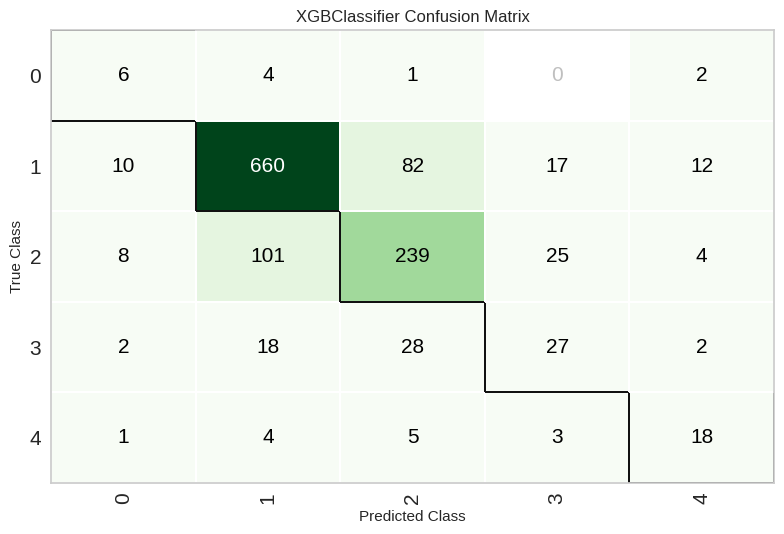

In [88]:
plot_model(best_model, plot = "confusion_matrix")